# <p align="center">Siemens Sales Forecast</p>

---

## <p align="center">*2 - Feature Selection & Modeling*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *April 1, 2025*  
📍 **Prepared for:** *Siemens*  

**GitHub Repo:** https://github.com/MGN19/Siemens-forecast

---

# ToC

<a class="anchor" id="top"></a>


1. [Import Libraries & Data](#1.-Import-Libraries-&-Data) <br><br>

2. [Product Category #1](#Product-Category-#1) <br><br>

In [1]:
## CELL TYPES (remover depois)

<div class="alert-danger">
    
test

<div class="alert-warning">
    
test

<div class="alert-info">
    
test

# 1. Import Libraries & Data

In [2]:
import os
import pandas as pd

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

import fs_modelling as fs

**Data**

In [3]:
X_train = pd.read_csv('./data/X_train_data/X_train.csv', index_col = 'Unnamed: 0')
X_val = pd.read_csv('./data/X_val_data/X_val.csv', index_col = 'Unnamed: 0')

def import_all_csvs(folder):
    """Imports all CSV files from a given folder and tracks variable names."""
    var_list = []

    for file in os.listdir(folder):
        if file.endswith('.csv'):
            df_name = file.replace('.csv', '')
            df = pd.read_csv(os.path.join(folder, file), index_col='Unnamed: 0')
            globals()[df_name] = df  # Save as a global variable
            var_list.append(df_name)  # Track variable name
    
    return var_list
    return y_train_vars, y_val_vars

# Import each CSV file as individual DataFrames
y_train_list = import_all_csvs('data/y_train_data')
y_val_list = import_all_csvs('data/y_val_data')

# Product Category #1

<a href="#top">Top &#129033;</a>

In [4]:
datasets = [X_train, X_val, y_train_1, y_val_1]

**Scaling**

In [7]:
X_train_scaled, X_val_scaled = fs.scale_data(X_train, 
                                          X_val, 
                                          scaler_type='minmax')

In [8]:
X_train_scaled

,CHI Production Index,CHI Shipments Index,FRA Production Index,FRA Shipments Index,GER Production Index,GER Shipments Index,ITA Production Index,ITA Shipments Index,JAP Production Index,JAP Shipments Index,SWI Production Index,SWI Shipments Index,UK Production Index,UK Shipments Index,USA Production Index,USA Shipments Index,Europe Production Index,Europe Shipments Index,(W) Price of Base Metals,(W) Price of Energy,(W) Price of Metals & Minerals,(W) Price of Natural gas index,"(W) Price of Crude oil, average",(W) Price of Copper,USA EUR to LCU Conversion Rate,USA EE Producer Prices,UK EE Producer Prices,ITA EE Producer Prices,FRA EE Producer Prices,GER EE Producer Prices,CHI EE Producer Prices,USA Machinery & Equipment Index,(W) Machinery & Equipment Index,SWI Machinery & Equipment Index,UK Machinery & Equipment Index,ITA Machinery & Equipment Index,JAP Machinery & Equipment Index,FRA Machinery & Equipment Index,GER Machinery & Equipment Index,USA EE Production Index,(W) EE Production Index,SWI EE Production Index,UK EE Production Index,ITA EE Production Index,JAP EE Production Index,FRA EE Production Index,GER EE Production Index,CC_CHI,CC_FRA,CC_GER,CC_ITA,CC_JAP,CC_Europe,CC_SWI,CC_UK,CC_USA,BC_CHI,BC_FRA,BC_GER,BC_ITA,BC_JAP,BC_Europe,BC_SWI,BC_UK,BC_USA,stock_price,stock_price_change,stock_volume,Covid_Chi,Covid_Fra,Covid_Ger,Covid_Ita,Covid_Swi,Covid_UK,Covid_US,Clean_Chi,Clean_Fra,Clean_Ger,Clean_Ita,Clean_Swi,Clean_UK,Clean_US,Fossil_Chi,Fossil_Fra,Fossil_Ger,Fossil_Ita,Fossil_Swi,Fossil_UK,Fossil_US,Buildings_Ger,Year,Month,Semester,sin_Semester,cos_Semester,Quarter,sin_Quarter,cos_Quarter,sin_month,cos_month,WeekendDaysCount,TotalDaysInMonth,WeekendDaysPercentage,SundayCount,GerHolidayCount
2018-10-01,0.455055,0.455055,0.980059,0.895399,0.931461,0.823964,1.000000,0.834537,0.703488,0.656106,0.831734,0.830289,0.820318,0.903393,0.969571,0.534129,0.898632,0.745167,0.407403,1.000000,0.277333,0.875449,1.000000,0.272243,0.475172,0.022348,0.074074,0.142858,0.000000,0.000000,1.000000,0.919577,0.736932,0.784014,0.896285,0.998645,0.746429,0.938389,0.824131,0.981152,0.612797,0.909385,0.648855,0.854916,0.603420,1.000000,0.960106,0.471020,0.384879,1.000000,1.000000,1.000000,1.000000,1.000000,0.771446,0.963015,0.779916,1.000000,0.838611,0.881465,1.000000,0.880013,1.000000,0.909788,0.795444,0.311574,0.272864,0.286517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447831,0.457072,0.296763,0.042453,0.000000,0.435315,0.000000,0.000000,0.560579,0.806148,0.685783,0.4,0.529906,0.489723,0.154716,0.000000,0.818182,1.0,0.000000e+00,1.0,1.000000,0.5,1.0,0.066987,0.750000,0.0,1.000000,0.000000,0.0,0.5
2018-11-01,0.502862,0.502862,0.832793,0.795206,1.000000,0.916469,0.843040,0.805717,0.661376,0.633657,0.915867,0.915144,0.842600,0.911347,0.923126,0.250585,0.873280,0.775855,0.358443,0.769859,0.240081,0.998180,0.741215,0.266696,0.385791,0.066037,0.111110,0.142858,0.000000,0.037037,0.842647,0.856145,0.706148,0.892007,0.914861,0.844173,0.689841,0.785150,0.922290,1.000000,0.586961,0.954693,0.677481,0.714628,0.595043,0.873754,0.930851,0.621029,0.301258,0.987365,0.965659,0.979311,0.955804,0.997001,0.714264,0.927306,0.720811,0.979463,0.805657,0.856118,0.995238,0.878020,0.948811,0.931394,0.739378,0.320268,0.527978,0.180438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237472,0.555831,0.118705,0.226415,0.227564,0.515734,0.201286,0.205115,0.857143,1.000000,0.691756,0.6,0.644281,0.413051,0.086534,0.000000,0.909091,1.0,0.000000e+00,1.0,1.000000,0.5,1.0,0.250000,0.933013,0.0,0.666667,0.114286,0.0,0.0
2018-12-01,0.621918,0.621918,0.748515,0.782404,0.851420,0.891916,0.563468,0.952048,0.667359,0.651853,1.000000,1.000000,0.631604,0.610014,0.713080,0.407405,0.696600,0.749461,0.334453,0.630799,0.211366,0.951620,0.591140,0.238431,0.398777,0.091066,0.314814,0.142858,0.040002,0.074073,0.780378,0.619472,0.575805,1.000000,0.722910,0.589431,0.693666,0.786730,1.000000,0.914701,0.321572,1.000000,0.437023,0.410072,0.606052,0.626246,0.220

## 2.1 Feature Selection

In [9]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

In [13]:
selected_features = {}

for y_train_name in y_train_list:
    y_train = globals()[y_train_name]
    selected_features[y_train_name] = fs.feature_selection(
        X_train_scaled, 
        y_train, 
        method='all', 
        rfe_model=lgb.LGBMRegressor(verbose = -1),
        mi_threshold = 0.01,
        plot=False
    )
    
    print('\n Next Feature... \n')

Selected 41 features by correlation
Selected 20 features by RFECV
Selected 27 features by importance with threshold 0.009523809523809525
Selected 32 features by Mutual Information
Selected 0 features that intersect across all methods

 Next Feature... 

Selected 41 features by correlation
Selected 20 features by RFECV
Selected 21 features by importance with threshold 0.009523809523809526
Selected 68 features by Mutual Information
Selected 0 features that intersect across all methods

 Next Feature... 

Selected 41 features by correlation
Selected 20 features by RFECV
Selected 18 features by importance with threshold 0.009523809523809525
Selected 63 features by Mutual Information
Selected 1 features that intersect across all methods

 Next Feature... 

Selected 41 features by correlation
Selected 20 features by RFECV
Selected 27 features by importance with threshold 0.009523809523809525
Selected 26 features by Mutual Information
Selected 1 features that intersect across all methods

 Ne

In [14]:
selected_features

{'y_train_36': [],
 'y_train_8': [],
 'y_train_20': ['Fossil_Ita'],
 'y_train_9': ['Fossil_Swi'],
 'y_train_4': ['Buildings_Ger', 'Fossil_Ita'],
 'y_train_11': ['Fossil_US', 'Fossil_Swi', 'GerHolidayCount', 'Fossil_Ita'],
 'y_train_5': ['Fossil_US', 'TotalDaysInMonth', 'Fossil_Swi', 'Fossil_UK'],
 'y_train_12': ['Fossil_US', 'Fossil_Ita'],
 'y_train_13': ['cos_Quarter'],
 'y_train_6': [],
 'y_train_16': ['Fossil_US', 'Fossil_Ita'],
 'y_train_3': ['Fossil_US', 'TotalDaysInMonth', 'Buildings_Ger', 'Fossil_Ita'],
 'y_train_1': ['Fossil_UK', 'sin_Quarter', 'Month'],
 'y_train_14': ['GerHolidayCount', 'Buildings_Ger']}

In [9]:
fs.feature_selection(X_train_scaled, y_train_1, 
                     method='all', 
                     rfe_model = lgb.LGBMRegressor(verbose = -1), 
                     corr_threshold=0.85, 
                     importance_threshold='mean', 
                     plot=False)

Selected 41 features by correlation
Selected 10 features by RFECV
Selected 26 features by importance with threshold 0.009523809523809525
Selected 25 features by Mutual Information
Selected 1 features that intersect across all methods


['sin_Quarter']

## 2.2 Model Training

**ARIMA**

In [22]:
model_fit_ar, val_preds_ar, model_summary_ar = fs.stats_models('arima', X_train, X_val, 
                                     y_train_1, y_val_1, order=(1,1,3),
                                     plot = False, 
                                     csv_path = './modelling_csvs/test3.csv')

Results appended to ./modelling_csvs/test3.csv


In [94]:
steps_ahead = 30  # Number of future steps you want to predict
future_preds = model_fit_ar.forecast(steps=steps_ahead)
print(future_preds)


2021-05-01    3.767997e+07
2021-06-01    4.141062e+07
2021-07-01    3.655150e+07
2021-08-01    3.989044e+07
2021-09-01    3.759609e+07
2021-10-01    3.917265e+07
2021-11-01    3.808932e+07
2021-12-01    3.883372e+07
2022-01-01    3.832221e+07
2022-02-01    3.867370e+07
2022-03-01    3.843217e+07
2022-04-01    3.859813e+07
2022-05-01    3.848409e+07
2022-06-01    3.856246e+07
2022-07-01    3.850861e+07
2022-08-01    3.854561e+07
2022-09-01    3.852019e+07
2022-10-01    3.853766e+07
2022-11-01    3.852565e+07
2022-12-01    3.853390e+07
2023-01-01    3.852823e+07
2023-02-01    3.853213e+07
2023-03-01    3.852945e+07
2023-04-01    3.853129e+07
2023-05-01    3.853003e+07
2023-06-01    3.853089e+07
2023-07-01    3.853030e+07
2023-08-01    3.853071e+07
2023-09-01    3.853043e+07
2023-10-01    3.853062e+07
Freq: MS, Name: predicted_mean, dtype: float64


**SARIMAX**

In [90]:
model_fit_sarx, val_preds_sarx, model_summary_sarx = fs.stats_models('sarimax', X_train, X_val, 
                                     y_train_1, y_val_1, order=(1,1,3),
                                     plot = False, 
                                     csv_path = './modelling_csvs/test3.csv')

/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/bcwds2/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Results appended to ./modelling_csvs/test3.csv


In [83]:
X_future = X_val # temp
future_preds = model_fit_sarx.forecast(steps=len(X_future), exog=X_future)
print(future_preds)


2021-05-01    3.951051e+07
2021-06-01    4.180620e+07
2021-07-01    4.068981e+07
2021-08-01    4.485621e+07
2021-09-01    4.369701e+07
2021-10-01    4.223861e+07
2021-11-01    3.961871e+07
2021-12-01    4.288582e+07
2022-01-01    3.167765e+07
2022-02-01    3.317506e+07
2022-03-01    3.887002e+07
2022-04-01    4.574127e+07
Freq: MS, Name: predicted_mean, dtype: float64


**Prophet**

10:50:47 - cmdstanpy - INFO - Chain [1] start processing
10:50:47 - cmdstanpy - INFO - Chain [1] done processing


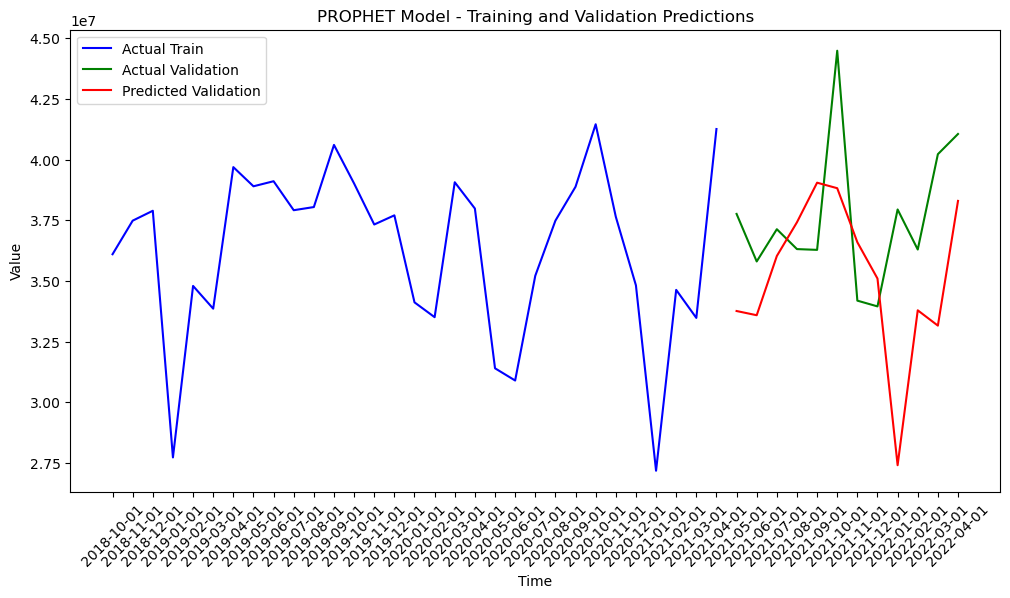

Results appended to ./modelling_csvs/test3.csv


In [91]:
model_fit_prof, val_preds_prof = fs.stats_models('prophet', X_train, X_val, 
                                 y_train_1, y_val_1, order=(1,1,3),
                                 plot = True, 
                                 csv_path = './modelling_csvs/test3.csv')


In [80]:
future_dates = pd.date_range(start='2022-04-01', periods=10, freq='M')
future_df = pd.DataFrame({'ds': future_dates})

future_preds = model_fit_prof.predict(future_df) 
print(future_preds[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


          ds          yhat    yhat_lower    yhat_upper
0 2022-04-30  4.022729e+07  3.848470e+07  4.212845e+07
1 2022-05-31  4.029798e+07  3.856007e+07  4.212756e+07
2 2022-06-30  3.390558e+07  3.222865e+07  3.577783e+07
3 2022-07-31  3.338732e+07  3.142394e+07  3.518023e+07
4 2022-08-31  3.849076e+07  3.674057e+07  4.030711e+07
5 2022-09-30  3.176397e+07  3.001308e+07  3.356449e+07
6 2022-10-31  3.609832e+07  3.420550e+07  3.788512e+07
7 2022-11-30  4.059999e+07  3.867652e+07  4.257146e+07
8 2022-12-31  3.681564e+07  3.507082e+07  3.857219e+07
9 2023-01-31  2.998908e+07  2.816692e+07  3.178522e+07


**Results**

In [92]:
test3 = pd.read_csv('modelling_csvs/test3.csv')
test3

,model_type,features_used,train_rmse,val_rmse,train_mape (%),val_mape (%)
0,arima,NaN,7.150329e+06,3.274455e+06,9.917684,7.220678
1,sarimax,"['CHI Production Index', 'CHI Shipments Index'...",4.959269e+06,5.530280e+06,6.760927,13.509213
2,prophet,"['CHI Production Index', 'CHI Shipments Index'...",NaN,4.517790e+06,NaN,9.376255


**ML Models**

In [20]:
from lazypredict.Supervised import LazyRegressor  # Use LazyClassifier for classification

# Initialize LazyPredict
lazy_regressor = LazyRegressor(verbose=0, ignore_warnings=True)

# Fit LazyPredict with the given train-test split
models, predictions = lazy_regressor.fit(X_train, X_val, y_train_1, y_val_1)

100%|██████████████████████████████████████████████████████████████| 42/42 [00:02<00:00, 19.83it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 36294712.838710
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet t

In [21]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,10748172554842836317440662376168969896647310218...,-9184802001411150436538545186469468037146180529...,8741959620876568501456716784340258948118478848.00,0.03
GaussianProcessRegressor,21.02,-170.07,37728033.15,0.01
LinearSVR,21.02,-170.07,37728002.24,0.01
MLPRegressor,21.02,-170.07,37727845.17,0.12
PassiveAggressiveRegressor,20.99,-169.79,37697123.96,0.02
KernelRidge,16.66,-132.81,33366659.57,0.01
Lasso,3.99,-24.53,14574004.66,0.01
LassoLars,2.20,-9.23,9224321.98,0.03
PoissonRegressor,1.95,-7.08,8201181.79,0.03


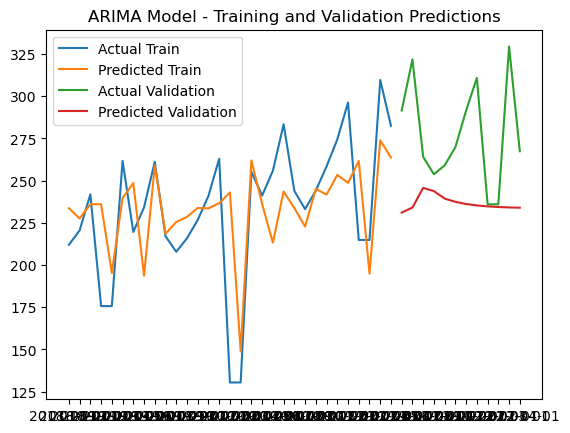

In [208]:
# Plot the training predictions
plt.plot(X_train.index, X_train[a], label='Actual Train')
plt.plot(X_train.index, train_preds, label='Predicted Train')

# Plot the validation predictions
plt.plot(X_val.index, X_val[a], label='Actual Validation')
plt.plot(X_val.index, val_preds, label='Predicted Validation')

plt.legend()
plt.title('ARIMA Model - Training and Validation Predictions')
plt.show()


,Unnamed: 0,#1
0,2018-10-01,36098918.79
1,2018-11-01,37482085.58
2,2018-12-01,37889612.12
3,2019-01-01,27728148.35
4,2019-02-01,34793163.53
5,2019-03-01,33856803.04
6,2019-04-01,39688292.01
7,2019-05-01,38897974.29
8,2019-06-01,39106750.23
9,2019-07-01,37912572.30


In [47]:
import pandas as pd
import numpy as np
import os
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.utils import all_estimators

def modelling(X_train, y_train, X_test, y_test, 
              features_used, 
              metric='RMSE', 
              model_choice='arima', 
              save_filename=None):

    save_folder = './modelling_csvs'
    if save_filename is None:
        raise ValueError('Need to name save file')
    else:
        save_path = os.path.join(save_folder, save_filename)

    if model_choice == 'arima':
        if len(features_used) > 1:
            raise ValueError('ARIMA only accepts 1 feature for the target variable.')

        model = ARIMA(y_train, order=(1, 1, 1))
        model_fit = model.fit()

        # Train RMSE (in-sample prediction)
        train_predictions = model_fit.predict(start=0, end=len(y_train)-1, dynamic=False)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))

        # Test RMSE
        predictions = model_fit.forecast(len(y_test))
        val_rmse = np.sqrt(mean_squared_error(y_test, predictions))

        best_model_name = 'ARIMA'
        best_score = val_rmse

        print(f'ARIMA Train RMSE: {train_rmse}')
        print(f'ARIMA Validation RMSE: {val_rmse}')

        
    elif model_choice == 'lazy':
        regressor = LazyRegressor(verbose=0)
        models, _ = regressor.fit(X_train[features_used], X_test[features_used], y_train, y_test)

        best_model_name = models.sort_values(by=metric).iloc[0].name
        
        regressors = dict(all_estimators(type_filter='regressor'))
        model = regressors[best_model_name]()

        model.fit(X_train[features_used], y_train)

        train_preds = model.predict(X_train[features_used])
        test_preds = model.predict(X_test[features_used])

        train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
        val_rmse = np.sqrt(mean_squared_error(y_test, test_preds))

        best_score = val_rmse

        print(f'Best model: {best_model_name}')
        print(f'Train RMSE: {train_rmse}')
        print(f'Validation RMSE: {val_rmse}')

    elif model_choice == 'prophet':
        raise ValueError('NOT WORKING YET')

    result_row = {
        'Features Used': ', '.join(features_used),
        'Best Model': best_model_name,
        'Train RMSE': train_rmse,
        'Validation RMSE': val_rmse
    }

    results_df = pd.DataFrame([result_row])
    results_df.to_csv(save_path, mode='a', header=not os.path.isfile(save_path), index=False)

    return best_model_name, train_rmse, val_rmse



In [49]:
best_model_name, best_score_train, best_score_val  = modelling(X_train_scaled, y_train_1, X_val_scaled, y_val_1, 
              features_used=selected_features, 
              metric='RMSE', 
              model_choice='lazy',
              save_filename = 'categ1_new.csv')

100%|████████████████████████████████████████| 42/42 [00:01<00:00, 29.55it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 36294712.838710
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet t

In [46]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_squared_error

def prophet_forecast(X_train, y_train, features_used, periods=10, freq='MS'):
    """
    Function to perform forecasting using Prophet for each feature in 'features_used'.

    Parameters:
    - X_train: DataFrame containing the training data
    - y_train: Actual ground truth values for RMSE calculation (training data)
    - features_used: List of features/columns to forecast using Prophet
    - periods: Number of future periods to predict (default=10)
    - freq: Frequency of the periods (default='MS' for monthly start)

    Returns:
    - best_model_name: Name of the best model ('prophet')
    - best_score: The lowest RMSE score for the model
    """
    best_score = float('inf')
    best_model_name = None

    # Initialize an empty DataFrame to hold future feature values
    future_features = pd.DataFrame()

    # Iterate through each column in 'features_used'
    for column in features_used:
        # Isolate the current column into a new DataFrame 'df1'
        df1 = X_train[[column]].copy()

        # Reset the index of 'df1' and rename columns to fit Prophet's expected format
        data = (df1.reset_index()
                .rename(columns={'index': 'ds', f'{column}': 'y'}))

        # Initialize Prophet model
        model = Prophet()

        # Fit the model to the data
        model.fit(data)

        # Create a DataFrame representing future dates to make predictions
        future = model.make_future_dataframe(periods=periods, freq=freq)

        # Forecast future dates
        forecast_index = model.predict(future)

        # Select relevant columns ('ds' for date, 'yhat' for predictions)
        forecast_index = forecast_index[['ds', 'yhat']]

        # Set the date column as the index
        forecast_index = forecast_index.set_index('ds')

        # Add the forecasted values to the 'future_features' DataFrame
        future_features[column] = forecast_index['yhat'].values

    # Reset the index of the future_features DataFrame to use 'ds' as a regular column
    future_features.reset_index(inplace=True)

    # Add the date column to 'future_features'
    future_features['ds'] = forecast_index.index.values

    # Set 'ds' as the index of 'future_features'
    future_features.set_index('ds', inplace=True)

    # Ensure we only compare the forecasted values against a valid subset of y_train
    # For simplicity, we will compare the mean of the forecasted values to the corresponding `y_train` values
    predicted_values = future_features[features_used].mean(axis=1)  # For simplicity, take the mean of all predictions

    rmse = mean_squared_error(y_train, predicted_values)

    # Compare RMSE to get the best model
    if rmse < best_score:
        best_score = rmse
        best_model_name = 'prophet'

    return best_model_name, best_score


In [47]:
prophet_forecast(X_train_1_scaled, y_train_1, selected_features) 

11:44:03 - cmdstanpy - INFO - Chain [1] start processing
11:44:03 - cmdstanpy - INFO - Chain [1] done processing
11:44:03 - cmdstanpy - INFO - Chain [1] start processing
11:44:03 - cmdstanpy - INFO - Chain [1] done processing


ValueError: Found input variables with inconsistent numbers of samples: [31, 41]

In [34]:
!pip install statsmodels

  Using cached statsmodels-0.14.4-cp313-cp313-macosx_10_13_x86_64.whl.metadata (9.2 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp313-cp313-macosx_10_13_x86_64.whl (10.2 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)


In [42]:
X_train_1_selected = X_train_1_scaled[selected_features]
X_val_1_selected = X_val_1_scaled[selected_features]

best_model_name, best_score = modelling(
    X_train_1_selected, y_train_1, X_val_1_selected, y_val_1, 
    features_used=selected_features, metric='RMSE'
)

100%|██████████████████████████████████████████████████████████████| 42/42 [00:01<00:00, 34.63it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 36289610.258065
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet t

In [67]:
# import lazypredict
# from lazypredict.Supervised import LazyRegressor
# from sklearn.metrics import mean_squared_error
# import numpy as np

# def lazy_regressor(X_train, y_train, X_test, y_test, metric='RMSE'):
    
#     # Initialize LazyRegressor
#     regressor = LazyRegressor(verbose=0)
    
#     # Fit the model
#     models, predictions = regressor.fit(X_train, X_test, y_train, y_test)
    
#     # Select the best model based on the metric (e.g., RMSE)
#     best_model = models.sort_values(by=metric).iloc[0]
    
#     # Get the model name and the best score
#     best_model_name = best_model.name
#     best_score = best_model[metric]
    
#     print(f'Best model: {best_model_name}')
#     print(f'{metric} of the best model: {best_score}')
    
#     # Return the best model and score
#     return best_model_name, best_score


In [68]:
# best_model_name, best_score = lazy_regressor(X_train_1_scaled, y_train_1,
#                                              X_val_1_scaled, y_val_1,
#                                              metric='RMSE')


100%|████████████████████████████████████| 42/42 [00:02<00:00, 17.66it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 31, number of used features: 0
[LightGBM] [Info] Start training from score 36289610.258065
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet t

In [43]:
file = pd.read_csv('./lazy_regressor_results.csv')
file

,Features Used,Best Model,RMSE
0,"(W) Price of Base Metals, GER Production Index...",SVR,2887703.96
1,USA Shipments Index_Rolling_Mean_3,HuberRegressor,2823366.38
2,"BC_CHI, USA Shipments Index_Rolling_Mean_3, CH...",HuberRegressor,2830173.62
3,"(W) Price of Base Metals, GER Production Index...",SVR,2887703.92
4,"(W) Price of Natural gas index, USA Production...",SVR,2887703.88


In [75]:
from autosklearn.experimental.askl2 import ForecasterAutoregMultiSeries
from sklearn.metrics import mean_squared_error
import numpy as np

def time_series_forecasting(X_train, y_train, X_test, y_test, 
                            forecast_steps=10, metric='neg_root_mean_squared_error'):

    # Initialize ForecasterAutoregMultiSeries
    forecaster = ForecasterAutoregMultiSeries(steps=forecast_steps, metric=metric)
    
    # Fit the forecaster with training data
    forecaster.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = forecaster.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Test RMSE: {rmse}')
    
    return forecaster, y_pred, rmse


ModuleNotFoundError: No module named 'autosklearn'

## Model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Fit the model using the training data
model.fit(X_train_1_scaled, y_train_1)

# Make predictions on the validation set
y_pred_val_1 = model.predict(X_val_1_scaled)

# Calculate RMSE for the validation set
rmse_val_1 = np.sqrt(mean_squared_error(y_val_1, y_pred_val_1))
print(f'Root Mean Squared Error on Validation Set: {rmse_val_1}')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(y_val_1.index, y_val_1, label='Actual Validation Values', linestyle='-', color='g')
plt.plot(y_val_1.index, y_pred_val_1, label='Predicted Validation Values', linestyle='--', color='g')

plt.plot(y_train_1.index, y_train_1, label='Actual Training Values', linestyle='-', color='b')

plt.xlabel('Date/Time')
plt.ylabel('Sales')
plt.title('XGBoost Forecasting: Actual vs Predicted (Training and Validation)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
